In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Import file 'emergency_911.csv'

In [174]:
df=pd.read_csv('emergency_911.csv')

df

In [175]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [176]:
df.tail(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
631958,40.155811,-75.485411,BLACK ROCK RD & S COLLEGEVILLE RD; UPPER PROV...,19460.0,EMS: RESPIRATORY EMERGENCY,4/28/2020 17:21,UPPER PROVIDENCE,BLACK ROCK RD & S COLLEGEVILLE RD,1
631959,40.103377,-75.412450,VALLEY FORGE CIR & OLD VALLEY FORGE RD; UPPER...,19406.0,EMS: SYNCOPAL EPISODE,4/28/2020 17:23,UPPER MERION,VALLEY FORGE CIR & OLD VALLEY FORGE RD,1
631960,40.150675,-75.132652,WELSH RD & BARTRAM RD; UPPER DUBLIN; 2020-04-2...,19090.0,Traffic: VEHICLE ACCIDENT -,4/28/2020 17:26,UPPER DUBLIN,WELSH RD & BARTRAM RD,1
631961,40.028232,-75.328032,AIRDALE RD & MONTROSE AVE; LOWER MERION; Stat...,19010.0,EMS: CVA/STROKE,4/28/2020 17:29,LOWER MERION,AIRDALE RD & MONTROSE AVE,1
631962,40.198001,-75.211581,WELSH RD & MARIETTA DR; LOWER GWYNEDD; 2020-04...,19002.0,Traffic: VEHICLE ACCIDENT -,4/28/2020 17:26,LOWER GWYNEDD,WELSH RD & MARIETTA DR,1


Get Information  of Data

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631963 entries, 0 to 631962
Data columns (total 9 columns):
lat          631963 non-null float64
lng          631963 non-null float64
desc         631963 non-null object
zip          555090 non-null float64
title        631963 non-null object
timeStamp    631963 non-null object
twp          631692 non-null object
addr         631963 non-null object
e            631963 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.4+ MB


Top 5 zip code

In [178]:
df['zip'].value_counts().head(5)

19401.0    43134
19464.0    41605
19403.0    33135
19446.0    30686
19406.0    21419
Name: zip, dtype: int64

Top 5 Township

In [179]:
df['twp'].value_counts().head(5)

LOWER MERION    53133
ABINGTON        38103
NORRISTOWN      35534
UPPER MERION    34471
CHELTENHAM      29142
Name: twp, dtype: int64

Unique Titles

In [180]:
df['title'].nunique()

147

title column contains "reason/department " so seggregate the reason in another column.

In [181]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])

In [182]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
631958        EMS
631959        EMS
631960    Traffic
631961        EMS
631962    Traffic
Name: reason, Length: 631963, dtype: object

find out most common reason of calls.

In [183]:
df['reason'].value_counts()

EMS        315733
Traffic    221547
Fire        94683
Name: reason, dtype: int64

Draw the counterplot for reason

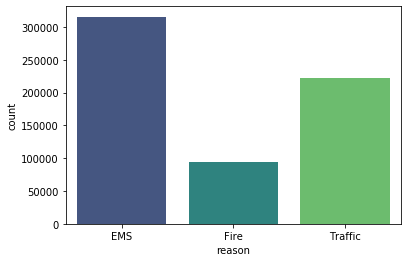

In [173]:
sns.countplot(x='reason', data=df, palette='viridis')

now we will check the time column. first of all check the type of timeStamp column

In [184]:
type(df['timeStamp'][1])

str

covert timestamp in proper format of date and time

In [185]:
df['cleantime']=pd.to_datetime(df['timeStamp'])

In [188]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:00
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:00


Grab the attribute from a datetime object by calling them 

In [128]:
time=df['cleantime'].iloc[0]
time.hour

17

create month, day_of_week and hour column from timeStamp column using apply function

In [190]:
df['month']=df['cleantime'].apply(lambda x: x.month)
df['day_of_week']=df['cleantime'].apply(lambda x: x.dayofweek)
df['hour']=df['cleantime'].apply(lambda x: x.hour)

In [192]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,month,day_of_week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:00,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:00,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:00,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:00,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:00,12,3,16


In [193]:
df['hour'].value_counts().head()

17    42225
16    40839
15    40124
14    38219
12    37900
Name: hour, dtype: int64

In [146]:
df['day_of_week'].nunique()

7

In [149]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,month,day_of_week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:00,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:00,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:00,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:00,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:00,12,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631958,40.155811,-75.485411,BLACK ROCK RD & S COLLEGEVILLE RD; UPPER PROV...,19460.0,EMS: RESPIRATORY EMERGENCY,4/28/2020 17:21,UPPER PROVIDENCE,BLACK ROCK RD & S COLLEGEVILLE RD,1,EMS,2020-04-28 17:21:00,4,1,17
631959,40.103377,-75.412450,VALLEY FORGE CIR & OLD VALLEY FORGE RD; UPPER...,19406.0,EMS: SYNCOPAL EPISODE,4/28/2020 17:23,UPPER MERION,VALLEY FORGE CIR & OLD VALLEY FORGE RD,1,EMS,2020-04-28 17:23:00,4,1,17
631960,40.150675,-75.132652,WELSH RD & BARTRAM RD; UPPER DUBLIN; 2020-04-2...,19090.0,Traffic: VEHICLE ACCIDENT -,4/28/2020 17:26,UPPER DUBLIN,WELSH RD & BARTRAM RD,1,Traffic,2020-04-28 17:26:00,4,1,17
631961,40.028232,-75.328032,AIRDALE RD & MONTROSE AVE; LOWER MERION; Stat...,19010.0,EMS: CVA/STROKE,4/28/2020 17:29,LOWER MERION,AIRDALE RD & MONTROSE AVE,1,EMS,2020-04-28 17:29:00,4,1,17


day_of_week column contains 0 to 6 values so we will give name of the day using map function

In [150]:
daymap={0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}

In [155]:
df['day_of_week']=df['day_of_week'].map(daymap)

In [156]:
df['day_of_week'].head()

0    wednesday
1    wednesday
2    wednesday
3    wednesday
4    wednesday
Name: day_of_week, dtype: object

In [157]:
df['day_of_week'].nunique()

7

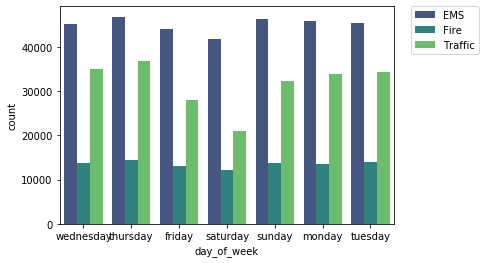

In [172]:
sns.countplot(x='day_of_week', hue='reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

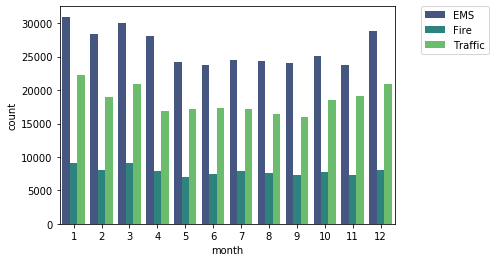

In [195]:
sns.countplot(x='month', hue='reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.08,1), loc=2, borderaxespad=0)

To count information of calls by month

In [199]:
bymonth=df.groupby(by='month', axis=0, as_index=True).count()

In [200]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,day_of_week,hour
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,52956,52956,52956,46685,52956,52956,52940,52956,52956,52956,52956,52956,52956
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467,48467
6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493,48493
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


plot a dataframe for count of calls per month

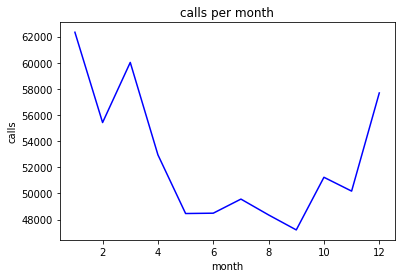

In [201]:
plt.plot(bymonth.index, bymonth['lat'], 'b')
plt.xlabel('month')
plt.ylabel('calls')
plt.title('calls per month')
plt.show()

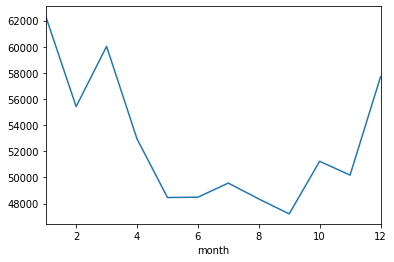

In [203]:
bymonth['lat'].plot()

for plotting lmplot we have to reset the index first

In [204]:
bymonth.reset_index(inplace=True)
bymonth.head(3)

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,day_of_week,hour
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027


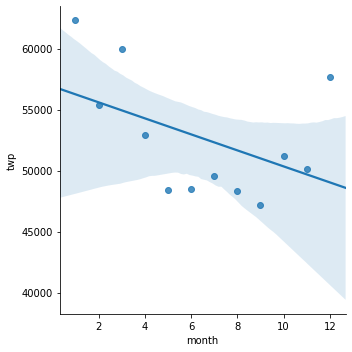

In [205]:
sns.lmplot(x='month', y='twp', data=bymonth)

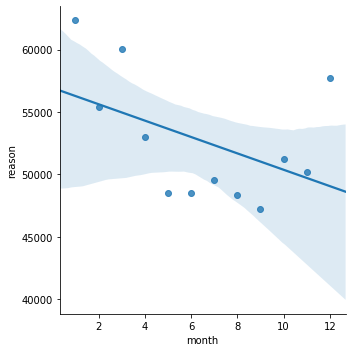

In [206]:
sns.lmplot(x='month', y='reason', data=bymonth)

add one more column date using timeStamp 

In [207]:
df['date']=df['cleantime'].apply(lambda x:x.date())

In [208]:
df['date'].head(3)

0    2015-12-10
1    2015-12-10
2    2015-12-10
Name: date, dtype: object

groupby using date and apply aggregate function i.e. count

In [219]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,month,day_of_week,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:00,12,3,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:00,12,3,17,2015-12-10


In [222]:
byDate = df.groupby('date').count()

In [224]:
byDate.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,month,day_of_week,hour
date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402


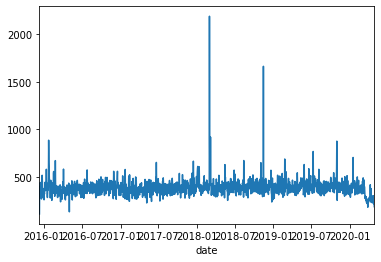

In [231]:
df.groupby('date').count()['lat'].plot()

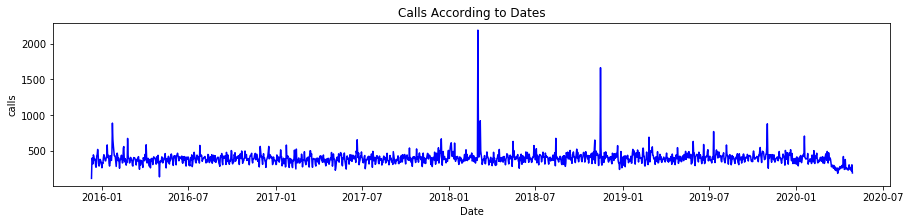

In [241]:
fig, axes=plt.subplots(figsize=(15,3))
axes.plot(byDate.index, byDate['twp'], 'b')
axes.set_xlabel('Date')
axes.set_ylabel('calls')
axes.set_title('Calls According to Dates');

recreate above plot but create 3 plots representing reason of 911 calls

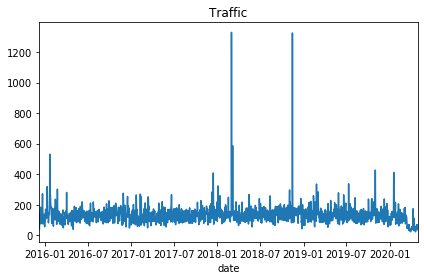

In [258]:
df[df['reason']=='Traffic'].groupby(['date']).count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

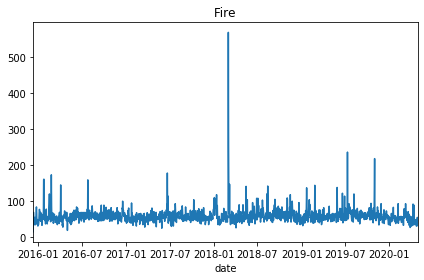

In [262]:
df[df['reason']=='Fire'].groupby(['date']).count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

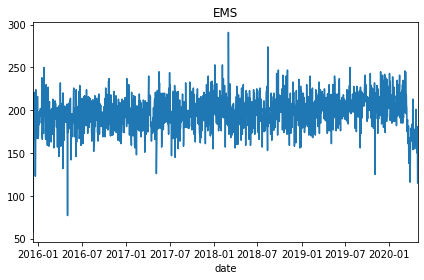

In [265]:
df[df['reason']=='EMS'].groupby(['date']).count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Now we will create Heatmap
for that we need to reconstruct our dataframe that columns will becomes hours and index becomes day of week

use unstack

In [266]:
dayhr=df.groupby(['hour','day_of_week']).count()['reason'].unstack()

In [268]:
dayhr.head(5)


day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,1795,1627,1577,1628,1873,2318,2315
1,1483,1379,1405,1324,1540,1958,2052
2,1297,1264,1204,1342,1374,1807,1863
3,1208,1157,1204,1172,1242,1517,1534
4,1275,1190,1057,1200,1249,1380,1408


In [271]:
pivot=df.pivot_table(values='twp', index='day_of_week', columns='hour', aggfunc='count')

In [273]:
pivot.head(5)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,1794,1479,1295,1208,1275,1749,2580,4290,5327,5497,...,5399,5906,6050,6154,5206,4275,3598,3094,2535,1967
1,1626,1375,1264,1156,1188,1670,2683,4260,5427,5344,...,5641,5991,6207,6618,5382,4373,3660,3241,2560,2009
2,1576,1403,1203,1201,1057,1518,2551,4491,5278,5205,...,5662,6167,6440,6724,5404,4462,3894,3332,2662,2097
3,1628,1323,1340,1170,1199,1684,2694,4292,5124,5145,...,5787,6168,6077,6653,5259,4464,3886,3331,2699,2245
4,1871,1537,1374,1242,1248,1557,2561,3996,4843,5036,...,6076,6703,6775,6816,5400,4808,4140,3691,3255,2708


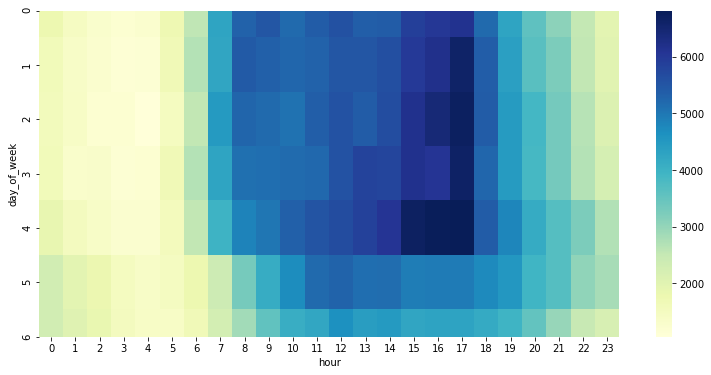

In [275]:
fig, ax=plt.subplots(figsize=(13,6))
sns.heatmap(pivot, cmap='YlGnBu')

now generate clustermap

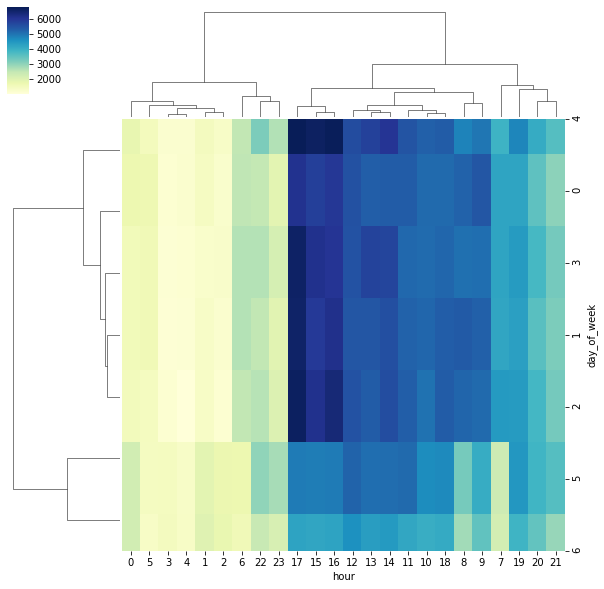

In [276]:
sns.clustermap(pivot, cmap='YlGnBu')

Repeat above plots for Dataframe where month represents column

In [277]:
pivot1=df.pivot_table(values='twp', index='day_of_week', columns='hour', aggfunc='count')

In [279]:
pivot1.head(5)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,1794,1479,1295,1208,1275,1749,2580,4290,5327,5497,...,5399,5906,6050,6154,5206,4275,3598,3094,2535,1967
1,1626,1375,1264,1156,1188,1670,2683,4260,5427,5344,...,5641,5991,6207,6618,5382,4373,3660,3241,2560,2009
2,1576,1403,1203,1201,1057,1518,2551,4491,5278,5205,...,5662,6167,6440,6724,5404,4462,3894,3332,2662,2097
3,1628,1323,1340,1170,1199,1684,2694,4292,5124,5145,...,5787,6168,6077,6653,5259,4464,3886,3331,2699,2245
4,1871,1537,1374,1242,1248,1557,2561,3996,4843,5036,...,6076,6703,6775,6816,5400,4808,4140,3691,3255,2708


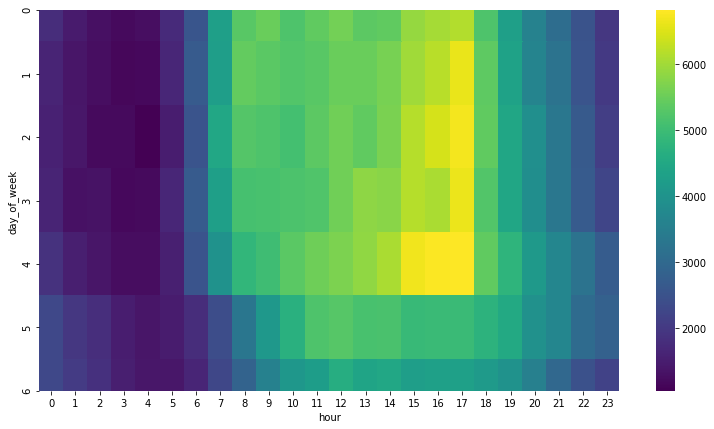

In [281]:
fig, ax=plt.subplots(figsize=(13,7))
sns.heatmap(pivot1, cmap='viridis')

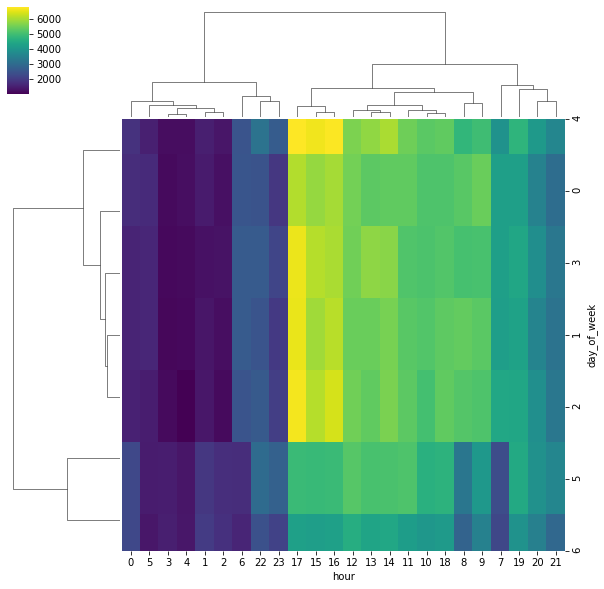

In [283]:
sns.clustermap(pivot1, cmap='viridis')

In [284]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,cleantime,month,day_of_week,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:00,12,3,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:00,12,3,17,2015-12-10


In [286]:
df['specific_reason']=df['title'].apply(lambda title: title.split(':')[1])

In [288]:
df['specific_reason'].nunique()

95

In [289]:
df['specific_reason'].value_counts().head(20)

 VEHICLE ACCIDENT -           143760
 DISABLED VEHICLE -            46226
 FIRE ALARM                    36339
 VEHICLE ACCIDENT              34964
 FALL VICTIM                   32632
 RESPIRATORY EMERGENCY         32516
 CARDIAC EMERGENCY             30935
 ROAD OBSTRUCTION -            21303
 SUBJECT IN PAIN               18690
 HEAD INJURY                   17306
 GENERAL WEAKNESS              11194
 SYNCOPAL EPISODE              10365
 SEIZURES                      10335
 UNKNOWN MEDICAL EMERGENCY     10130
 MEDICAL ALERT ALARM            9738
 ALTERED MENTAL STATUS          9553
 FIRE INVESTIGATION             8949
 ABDOMINAL PAINS                8606
 UNCONSCIOUS SUBJECT            8251
 OVERDOSE                       7875
Name: specific_reason, dtype: int64